## **Radom Forest**

We have learned about Decision Tree and how it is used to predict the class or value of the response variable by learning simple decision rules inferred from training data. The random forest is an algorithm that consists of many decisions trees. It creates a set of **random** individual trees and brings together those individual decision trees to create a **forest**.

**Random Forest** uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees. Random Forest predictions are more accurate than that of any individual tree.

Two key concepts that give it the name **random**:<br/>
1. A random sampling of training data set when building trees.<br/>
2. Random subsets of features considered when splitting nodes.<br/>

Random forest ensures that the behavior of each individual tree is not too correlated with the behavior of any other tree in the model by using the following two methods:<br/>
* **Bagging** (bootstrap aggregation): randomly sample from the dataset with replacement, resulting in different trees. This process is called Bagging. Suppose there are N rows in the train data set. Each tree will still be built using N rows with some rows repeated.<br/>

* **Random feature selection**: random subsets of features for each tree.<br/>

This forces even more variation amongst the trees in the model and ultimately results in low correlation across trees and more diversification.

Final prediction is done by **ensemble** approach using individual tree prediction results. 

* **Classification Ensemble:** Each individual tree in the random forest results in a class prediction and the class with the most votes becomes Random Forest model’s prediction.

* **Regression Ensemble:** Each individual tree in the random forest results in a value prediction and the average value of all predictions becomes Random model’s prediction.

Uncorrelated trees can produce ensemble predictions that are more accurate than any of the individual predictions. This explains why **Random Forest** models tend to produce more accurate results than **Decision Tree** models. 

### Example: Adult dataset

Step 1: Read the data

In [48]:
import pandas as pd
file = 'adult.csv'
adult = pd.read_csv(file, na_values = '?')
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [49]:
# Data frame description
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [50]:
# Total number of rows in the dataset
print('number of rows is: {}'.format(adult.shape[0]))
print('number of columns is: {}'.format(adult.shape[1]))

number of rows is: 32561
number of columns is: 15


In [51]:
# check for missing values
adult.isna().sum()

# columns with missing values: workclass, occupation, native-country

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [52]:
# remove any rows that has missing values
adult_clean = adult.dropna()
adult_clean.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [53]:
# Total number of rows after removing missing values
print('number of rows is: {}'.format(adult_clean.shape[0]))
print('number of columns is: {}'.format(adult_clean.shape[1]))

number of rows is: 30162
number of columns is: 15


Step 2: Identify features and the response variable

In [54]:
response = adult_clean['salary']
features = adult_clean.drop(columns = ['salary'], axis = 1)

In [55]:
features.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [56]:
response.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: salary, dtype: object

In [57]:
# check for the values in the response variable
response.drop_duplicates()

0    <=50K
7     >50K
Name: salary, dtype: object

In [58]:
response.unique()

array(['<=50K', '>50K'], dtype=object)

In [59]:
response.nunique()

2

Step 3: Preprocess Data

In [64]:
features

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [60]:
# select columns with numerical data types
num_cols = features.select_dtypes(include = ['int64', 'float64']).columns.to_list()

# select columns with categorical data types
cat_cols = features.select_dtypes(include = ['object', 'bool']).columns.to_list()

In [63]:
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

Now, let's encode the categorical columns

In [73]:
from collections import defaultdict
def return_always_one():
    return 1
check_dict = defaultdict(return_always_one)

In [76]:
check_dict['key_1'] = 'new_value'

In [75]:
check_dict['key_3']

1

In [77]:
dictionary['key_1']

'new_value'

In [78]:
# encoding categorical data values
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

features[cat_cols] = features[cat_cols].astype(str) # let's make sure all categorical variables are of type str
dictionary = defaultdict(LabelEncoder) #retain all columns LabelEncoder() as a dictionary

features[cat_cols] = features[cat_cols].apply(lambda x: dictionary[x.name].fit_transform(x))

In [79]:
features[cat_cols].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,5,9,4,0,1,4,1,38
1,4,9,2,3,0,4,1,38
2,2,11,0,5,1,4,1,38
3,2,1,2,5,0,2,1,38
4,2,9,2,9,5,2,0,4


In [80]:
dictionary['workclass'].inverse_transform(features['workclass'])

array(['State-gov', 'Self-emp-not-inc', 'Private', ..., 'Private',
       'Private', 'Self-emp-inc'], dtype=object)

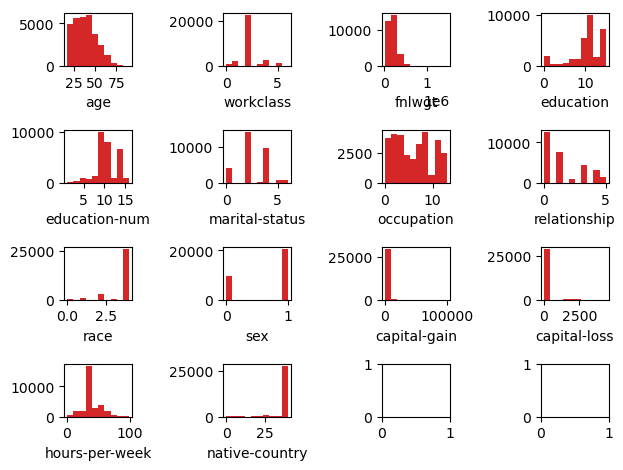

In [81]:
# Data visualization
import matplotlib.pyplot as plt

cols_names = features.columns.to_list()
fig, ax = plt.subplots(nrows=4, ncols=4)
for idx,axs in zip(range(len(cols_names)),ax.ravel()):
    axs.hist(features[cols_names[idx]], color = 'Tab:red')
    axs.set_xlabel(cols_names[idx])
plt.tight_layout()
plt.show()

Step 4: Split the data

In [82]:
from sklearn.model_selection import train_test_split
features_train, features_test, response_train, response_test = train_test_split(features, response, test_size = 0.2, random_state = 0)

Step 5: Train a random forest model

In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0)
classifier.fit(features_train, response_train)

RandomForestClassifier(random_state=0)

Step 6: Generate predictions and evaluate the model

In [84]:
predictions = classifier.predict(features_test)

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [86]:
print('accuracy score on test data is {}'.format(accuracy_score(response_test, predictions)))

accuracy score on test data is 0.8518150174042765


In [87]:
# confusion matrix
idx = ['actual 0', 'actual 1']
cols = ['pred 0', 'pred 1']
cm = pd.DataFrame(confusion_matrix(response_test, predictions),
                  columns = cols,
                  index = idx)
cm

,pred 0,pred 1
actual 0,4221,311
actual 1,583,918


In [89]:
np.unique(response_test, return_counts=True)

(array(['<=50K', '>50K'], dtype=object), array([4532, 1501], dtype=int64))

In [90]:
4532/(4532+1501)

0.7512017238521466

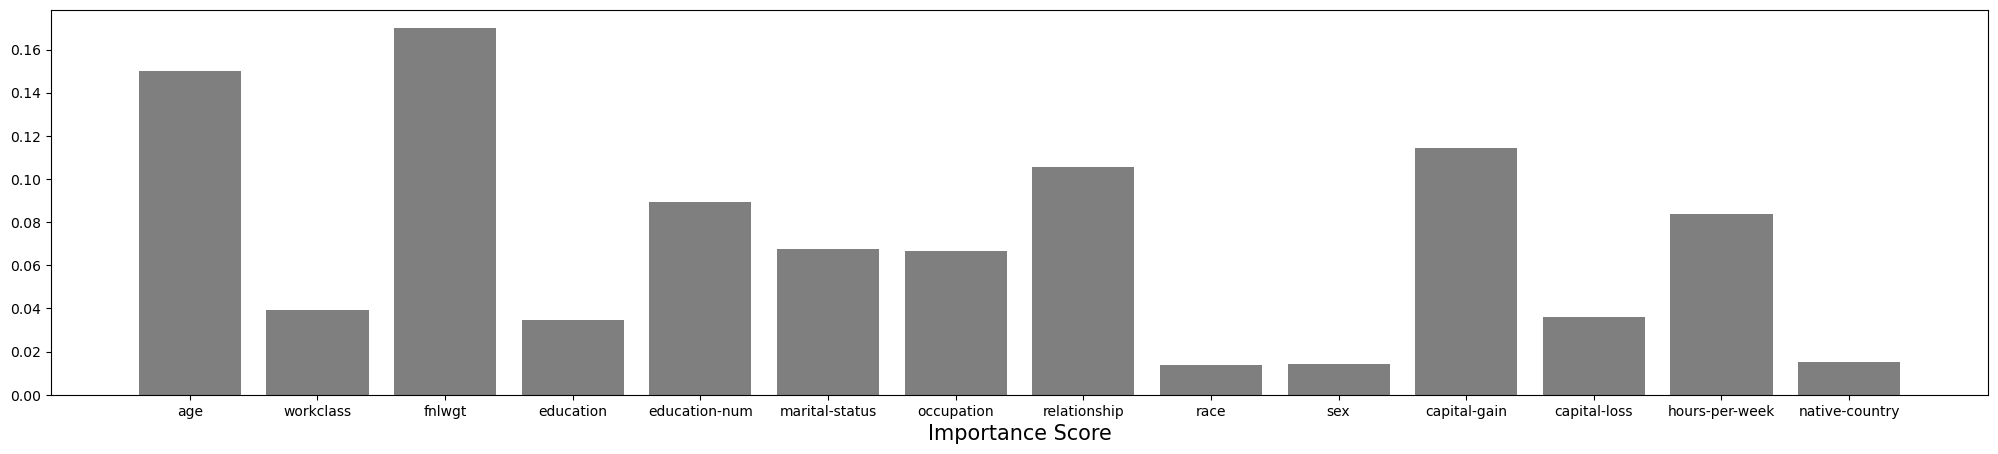

In [91]:
# Features importances
plt.figure(figsize = (25, 5))
plt.bar(x = cols_names, height = classifier.feature_importances_, color = 'Tab:gray')
plt.xlabel('Features', fontsize = 15)
plt.xlabel('Importance Score', fontsize = 15)
plt.show()

Step 7: Comparison

Let's use a decission tree model to compare the results

In [92]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 0)
classifier_dt.fit(features_train, response_train)

DecisionTreeClassifier(random_state=0)

In [93]:
predictions_dt = classifier_dt.predict(features_test)

In [94]:
print('accuracy score on test data is {}'.format(accuracy_score(response_test, predictions_dt)))

accuracy score on test data is 0.8068954085861098


In [95]:
# confusion matrix
idx = ['actual 0', 'actual 1']
cols = ['pred 0', 'pred 1']
cm_dt = pd.DataFrame(confusion_matrix(response_test, predictions_dt),
                  columns = cols,
                  index = idx)
cm_dt

,pred 0,pred 1
actual 0,3928,604
actual 1,561,940


## Evaluating Multiple Models

Classification

In [111]:
x_train, x_val, y_train, y_val = train_test_split(features_train, response_train, test_size = 0.2, random_state = 0)

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_list = [LogisticRegression(max_iter=int(1e10)), DecisionTreeClassifier(random_state = 0), RandomForestClassifier(random_state = 0)]
model_names = ['Logistic regression', 'Decision Tree', 'Random Forest']
accuracy_list = []


for model in range(len(model_list)):
    classifier = model_list[model]
    "gridsearch on each"
    classifier.fit(x_train, y_train)
    predictions = classifier.predict(x_val)
    accuracy_list.append(accuracy_score(y_val, predictions))

results_dict = {'Model name': model_names, 'Accuracy':accuracy_list}

In [113]:
results_df = pd.DataFrame(results_dict)
results_df

,Model name,Accuracy
0,Logistic regression,0.787816
1,Decision Tree,0.804807
2,Random Forest,0.849358


Regression

In [116]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [117]:
feature_names= ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
x = pd.DataFrame(data, columns = feature_names)
y = pd.Series(target, name='MEDV')


In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
X_ttrain, X_val, Y_ttrain, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)


In [119]:
from sklearn import metrics

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

my_models = {'Linear regression': LinearRegression(),
             'Decision Tree': DecisionTreeRegressor(random_state = 0),
             'Random Forest': RandomForestRegressor(random_state = 0)}
my_params={'Linear regression': {'fit_intercept' : [False,True]},
           'Decision Tree': {'criterion': ['squared_error', 'absolute_error'],
                             'min_samples_split': np.arange(1,5)},
           'Random Forest': {'n_estimators': [100,200,300,400,500],
                             'criterion': ['squared_error', 'absolute_error']},
          }

best_params = []
r_squared = []
mae_list = []
mse_list = []
mape_list = []


for model_name, model in my_models.items():
    param_grid = my_params[model_name]
    temp_gridsearchcv = GridSearchCV(model, param_grid, cv = 5)
    temp_gridsearchcv.fit(X_ttrain, Y_ttrain)
    
    predictions = temp_gridsearchcv.predict(X_val)
    best_params.append(temp_gridsearchcv.best_params_)
    r_squared.append(metrics.r2_score(Y_val, predictions))
    mae_list.append(metrics.mean_absolute_error(Y_val, predictions))
    mse_list.append(metrics.mean_squared_error(Y_val, predictions))
    mape_list.append(metrics.mean_absolute_percentage_error(Y_val, predictions))

results_dict = {'Model name': model_names,
                'best params': best_params,
                'R squared': r_squared,
                'Mean Absolute Error':mae_list,
                'Mean Squared Error':mse_list,
                'Mean Absolute Percentage Error':mape_list}

In [122]:
results_df = pd.DataFrame(results_dict)
results_df

,Model name,best params,R squared,Mean Absolute Error,Mean Squared Error,Mean Absolute Percentage Error
0,Logistic regression,{'fit_intercept': True},0.759268,3.415162,20.160371,0.183350
1,Decision Tree,"{'criterion': 'absolute_error', 'min_samples_s...",0.640298,3.366667,30.123642,0.164890
2,Random Forest,"{'criterion': 'squared_error', 'n_estimators':...",0.869561,2.386846,10.923746,0.119549


In [124]:
results_df.loc[2, 'best params']

{'criterion': 'squared_error', 'n_estimators': 400}

In [126]:
final_model = RandomForestRegressor(criterion= 'squared_error', n_estimators= 400, random_state=0)
final_model.fit(X_train, Y_train)

predictions = final_model.predict(X_test)

pd.DataFrame([{'R squared': metrics.r2_score(Y_test, predictions),
                'Mean Absolute Error':metrics.mean_absolute_error(Y_test, predictions),
                'Mean Squared Error':metrics.mean_squared_error(Y_test, predictions),
                'Mean Absolute Percentage Error':metrics.mean_absolute_percentage_error(Y_test, predictions)}])

,R squared,Mean Absolute Error,Mean Squared Error,Mean Absolute Percentage Error
0,0.778546,2.638321,18.032635,0.123534


In [ ]:
final_model = RandomForestRegressor(criterion= 'squared_error', n_estimators= 400, random_state=0)
final_model.fit(x, y)